# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 1. Cвойства и сравнение оценок
### Мягкий дедлайн --- 6 октября 23:59
### Жёсткий дедлайн --- 12 октября 16:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [1]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import math
from tqdm import tqdm

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [3]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Ставится задача изучить способы оценивания параметра $\theta$ семейства распределений $U[0, \theta]$. В данной задаче Вы численно смоделируете оценки параметра $\theta$ и сделаете вывод о том, какую оценку стоит применить на практике.

Сгенерируйте $N$ выборок $X_1, \dots, X_N$ размера $N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$ и $\theta = 2$.

In [71]:
N = 1e4  # use this
N = int(N)
true_theta = 2

X  = sps.uniform.rvs(loc=0, scale=true_theta, size=(N, N))

Для всех $N$ выборок посчитайте оценки параметра $\theta$: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

In [72]:
estimation_1 = 2 * X.mean(axis=1)
estimation_2 = X.mean(axis=1) + X.max(axis=1) / 2
estimation_3 = (N + 1) * X.min(axis=1)
estimation_4 = X.max(axis=1) + X.min(axis=1)
estimation_5 = (N + 1) / N * X.max(axis=1)

При помощи моделирования выясните, какие оценки точнее, чем другие.

Для этого прикиньте распределение каждой из оценок. Какая оценка предпочтительнее? Почему?

In [73]:
kernel_1 = sps.gaussian_kde(estimation_1)
kernel_2 = sps.gaussian_kde(estimation_2)
kernel_3 = sps.gaussian_kde(estimation_3)
kernel_4 = sps.gaussian_kde(estimation_4)
kernel_5 = sps.gaussian_kde(estimation_5)

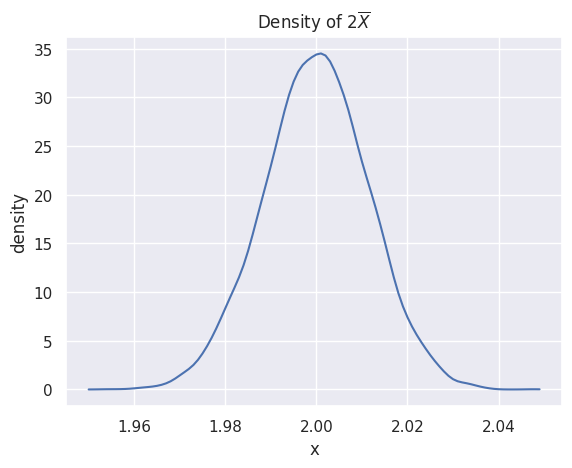

In [74]:
plt.title(r"Density of $2\overline{X}$")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(np.arange(1.95, 2.05, 1e-3), kernel_1(np.arange(1.95, 2.05, 1e-3)))
plt.show()

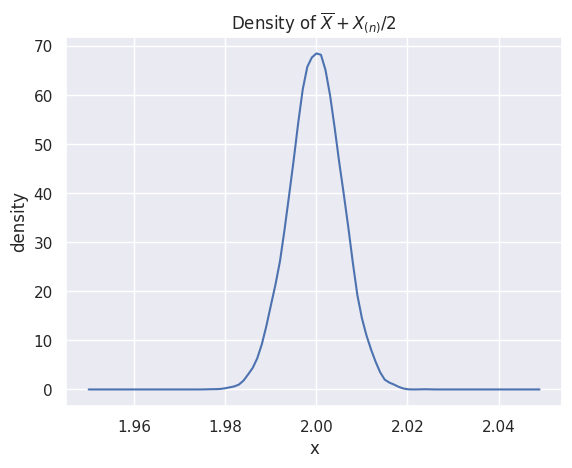

In [75]:
plt.title(r"Density of $\overline{X} + X_{(n)}/2$")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(np.arange(1.95, 2.05, 1e-3), kernel_2(np.arange(1.95, 2.05, 1e-3)))
plt.show()

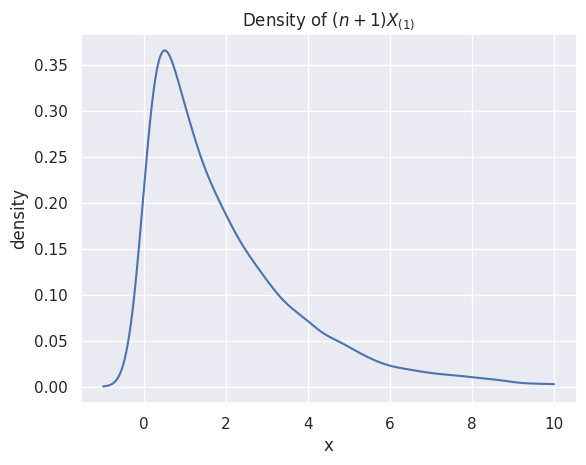

In [76]:
plt.title(r"Density of $(n + 1)X_{(1)}$")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(np.arange(-1, 10, 1e-3), kernel_3(np.arange(-1, 10, 1e-3)))
plt.show()

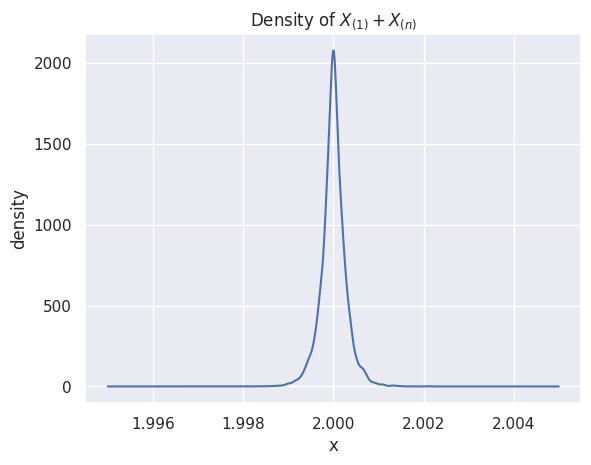

In [77]:
plt.title(r"Density of $X_{(1)} + X_{(n)}$")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(np.arange(1.995, 2.005, 1e-5), kernel_4(np.arange(1.995, 2.005, 1e-5)))
plt.show()

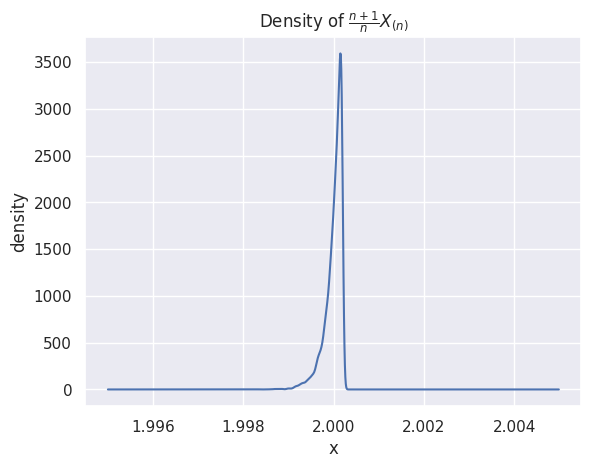

In [78]:
plt.title(r"Density of $\frac{n + 1}{n}X_{(n)}$")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(np.arange(1.995, 2.005, 1e-5), kernel_5(np.arange(1.995, 2.005, 1e-5)))
plt.show()

Вычислим ядерную плотность, после чего для каждой оценки построим свой график этой самой плотности. Так качество у оценок координально разное, то построим их в разных масштабах, после чего сравним.

*Нумерация у оценок такая же, в каком порядке они идут в условии задачи.*

 При сравнении графиков видно, что лучше всего плотность концентрируется у двойки (то есть у истинного значения параметра $\theta$) для последних двух оценок, первые две оценки дают качество значительно хуже ("хвосты" у графиков распределений значительно тяжелее). Третья же оценка даёт оценку хуже всего, у ее эмпирической плотности очень тяжелые хвосты.

 Из всего этого делаем вывод, что предпочтительнее всего последние две оценки.

Как меняется распределение каждой оценки с ростом параметра? Постройте оценки не только по выборкам, но и по их префиксам. В качестве размера префикса возьмите хотя бы 4 значения, меньших N.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Изучите оценки на состоятельность и нормальность. Сравните скорости сходимости.

In [79]:
sizes = [10, 100, 500, 1000, 10000]

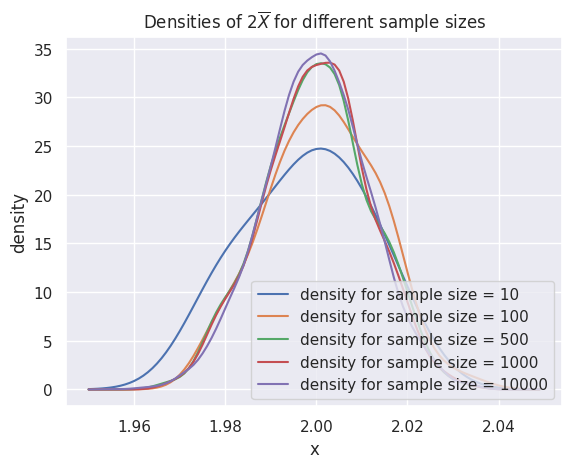

In [80]:
plt.title(r"Densities of $2\overline{X}$ for different sample sizes")
plt.xlabel("x")
plt.ylabel("density")
for k in sizes:
    kernel = sps.gaussian_kde(2 * X[:k].mean(axis=1))
    plt.plot(np.arange(1.95, 2.05, 1e-3), kernel(np.arange(1.95, 2.05, 1e-3))\
             , label = f"density for sample size = {k}")
plt.legend(loc='lower right')
plt.show()

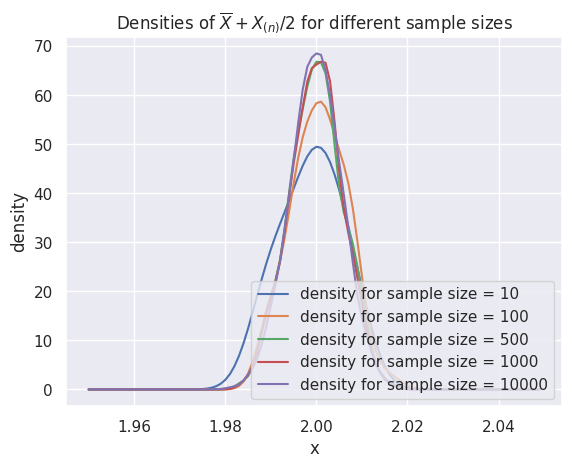

In [81]:
plt.title(r"Densities of $\overline{X} + X_{(n)} / 2$ for different sample sizes")
plt.xlabel("x")
plt.ylabel("density")
for k in sizes:
    kernel = sps.gaussian_kde(X[:k].mean(axis=1) + X[:k].max(axis=1) / 2)
    plt.plot(np.arange(1.95, 2.05, 1e-3), kernel(np.arange(1.95, 2.05, 1e-3))\
             , label = f"density for sample size = {k}")
plt.legend(loc='lower right')
plt.show()

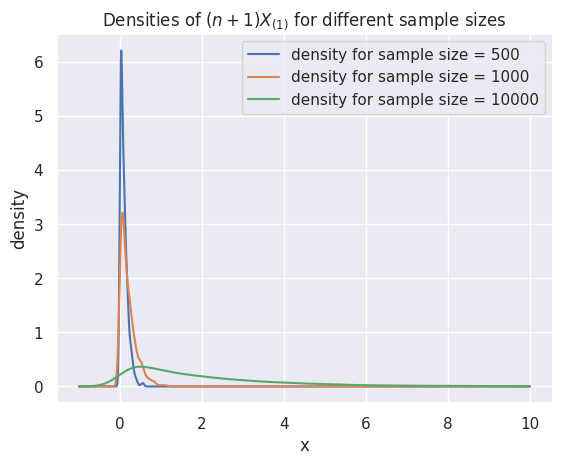

In [82]:
plt.title(r"Densities of $(n + 1)X_{(1)}$ for different sample sizes")
plt.xlabel("x")
plt.ylabel("density")
for k in sizes[2:]:
    kernel = sps.gaussian_kde((k + 1) * X[:k].min(axis=1))
    plt.plot(np.arange(-1, 10, 1e-3), kernel(np.arange(-1, 10, 1e-3))\
             , label = f"density for sample size = {k}")
plt.legend()
plt.show()

*Remark: для слишком маленьких размеров выборки для третьей оценки плотность выглядит слижком уж плохо, а потому эти случаи были убраны.*

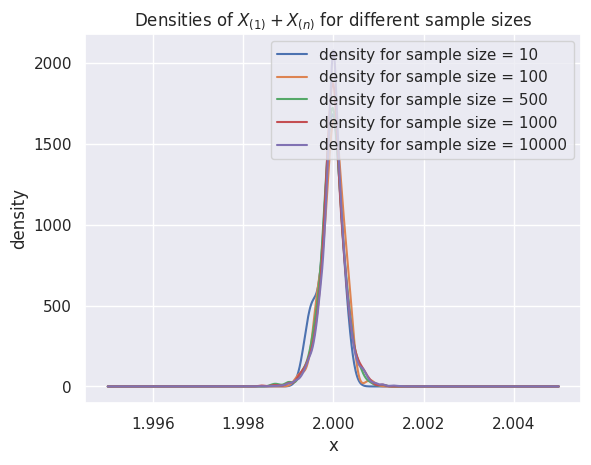

In [83]:
plt.title(r"Densities of $X_{(1)} + X_{(n)}$ for different sample sizes")
plt.xlabel("x")
plt.ylabel("density")
for k in sizes:
    kernel = sps.gaussian_kde(X[:k].max(axis=1) + X[:k].min(axis=1))
    plt.plot(np.arange(1.995, 2.005, 1e-5)\
             , kernel(np.arange(1.995, 2.005, 1e-5))\
             , label = f"density for sample size = {k}")
plt.legend()
plt.show()

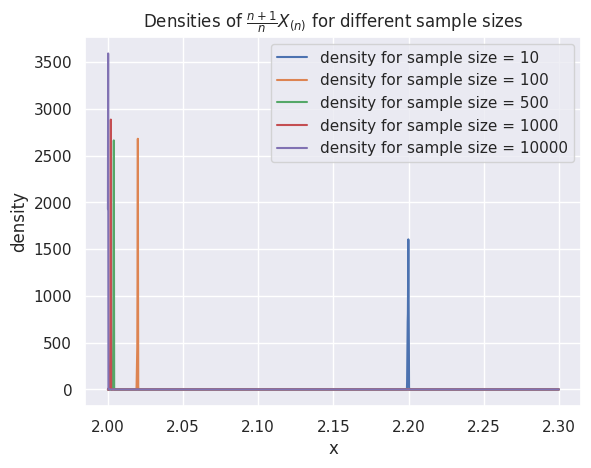

In [84]:
plt.title(r"Densities of $\frac{n + 1}{n}X_{(n)}$ for different sample sizes")
plt.xlabel("x")
plt.ylabel("density")
for k in sizes:
    kernel = sps.gaussian_kde((k + 1) / k * X[:k].max(axis=1))
    plt.plot(np.arange(2, 2.3, 1e-5)\
             , kernel(np.arange(2, 2.3, 1e-5))\
             , label = f"density for sample size = {k}")
plt.legend()
plt.show()

Во всех случаях, кроме третьего, чем больше размер выборки, тем лучше плотность концентрируется вокруг двойки. Особо интересны здесь третья и пятая оценка. У третьей сходимость очень медленная, для, казалось бы, уже достаточно больших значений размера все еще не наблюдаем сходимости. А для пятой плотности с увеличением размера выборки пик эмпирической плотности все ближе к двйоке, что видно из графика.

Проверим теперь состоятельность. Нужно проверить, что для любого $\varepsilon > 0$ вероятность отклонения оценки от истинного значения параметра стремится к нулю. Для проверки состоятельности построим следующие графики. *Значения $\varepsilon$ подбирались эмпирически.*

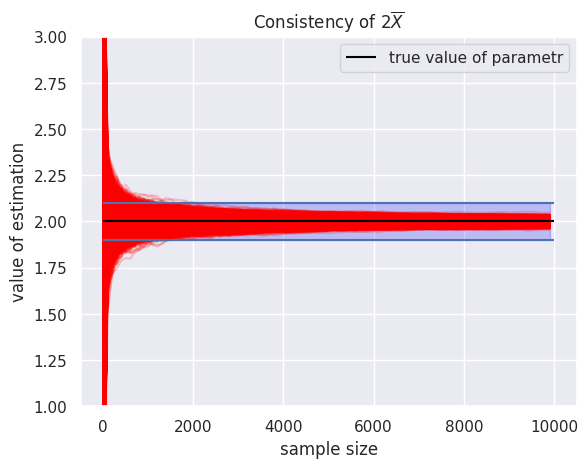

In [85]:
Y = 2 * X.cumsum(axis=1) / np.arange(1, N + 1)
Y = Y.T[0:N+1:100]

plt.title(r"Consistency of $2 \overline{X}$")
plt.plot(np.arange(1, N + 1, 100), Y, alpha=0.2, color="red")
plt.xlabel("sample size")
plt.ylabel("value of estimation")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta, label = "true value of parametr"\
           , color="black")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta + 0.1)
plt.hlines(xmin=1, xmax=N + 1, y=true_theta - 0.1)
plt.fill_between(x=np.arange(1, N + 1, 100), y1=2-0.1, y2=2+0.1\
                 , color='blue', alpha=0.2)
plt.legend()
plt.ylim(1, 3)
plt.show()

Первая оценка, как мы видим, состоятельная.

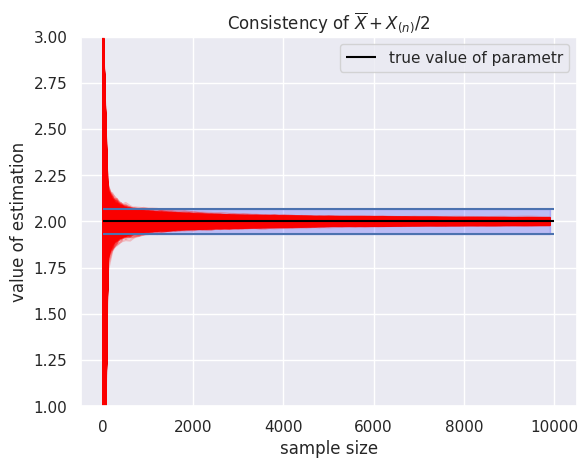

In [86]:
Y = X.cumsum(axis=1) / np.arange(1, N + 1)\
+ np.maximum.accumulate(X, axis=1) / 2
Y = Y.T[0:N+1:100]

plt.title(r"Consistency of $\overline{X} + X_{(n)}/2$")
plt.plot(np.arange(1, N + 1, 100), Y, alpha=0.2, color="red")
plt.xlabel("sample size")
plt.ylabel("value of estimation")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta, label = "true value of parametr"\
           , color="black")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta + 0.07)
plt.hlines(xmin=1, xmax=N + 1, y=true_theta - 0.07)
plt.fill_between(x=np.arange(1, N + 1, 100), y1=2-0.07, y2=2+0.07\
                 , color='blue', alpha=0.2)
plt.legend()
plt.ylim(1, 3)
plt.show()

Вторая оценка тоже состоятельная, причем даже быстрее сходится.

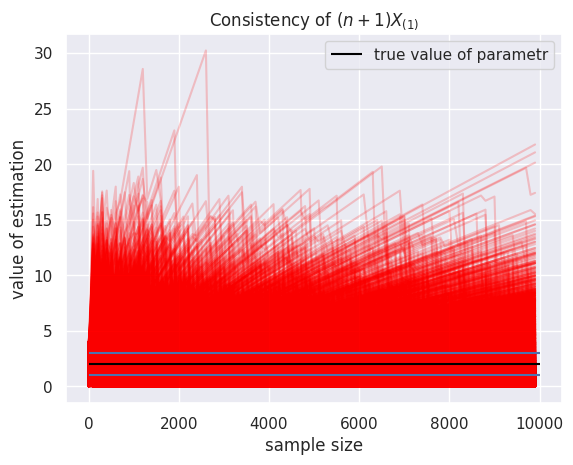

In [87]:
Y = np.minimum.accumulate(X, axis=1) * np.arange(2, N + 2)
Y = Y.T[0:N+1:100]

plt.title(r"Consistency of $(n + 1)X_{(1)}$")
plt.plot(np.arange(1, N + 1, 100), Y, alpha=0.2, color="red")
plt.xlabel("sample size")
plt.ylabel("value of estimation")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta, label = "true value of parametr"\
           , color="black")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta + 1)
plt.hlines(xmin=1, xmax=N + 1, y=true_theta - 1)
plt.fill_between(x=np.arange(1, N + 1, 100), y1=2-1, y2=2+1\
                 , color='blue', alpha=0.2)
plt.legend()
plt.show()

Здесь состоятельности не наблюдаем.

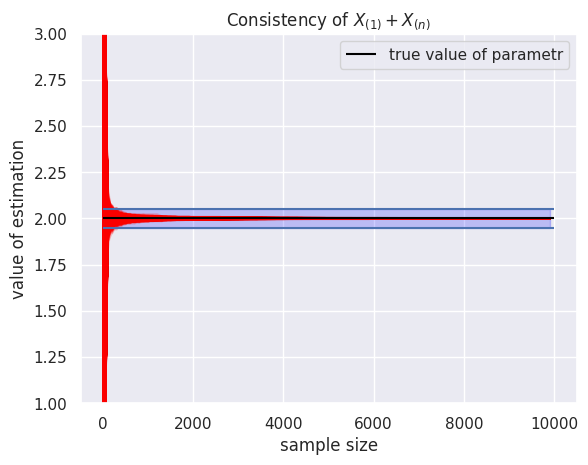

In [88]:
Y = np.maximum.accumulate(X, axis=1) + np.minimum.accumulate(X, axis=1)
Y = Y.T[0:N+1:100]

plt.title(r"Consistency of $X_{(1)} + X_{(n)}$")
plt.plot(np.arange(1, N + 1, 100), Y, alpha=0.2, color="red")
plt.xlabel("sample size")
plt.ylabel("value of estimation")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta, label = "true value of parametr"\
           , color="black")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta + 0.05)
plt.hlines(xmin=1, xmax=N + 1, y=true_theta - 0.05)
plt.fill_between(x=np.arange(1, N + 1, 100), y1=2-0.05, y2=2+0.05\
                 , color='blue', alpha=0.2)
plt.legend()
plt.ylim(1, 3)
plt.show()

Четвертая оценка состоятельна, причем сходимость очень быстрая.

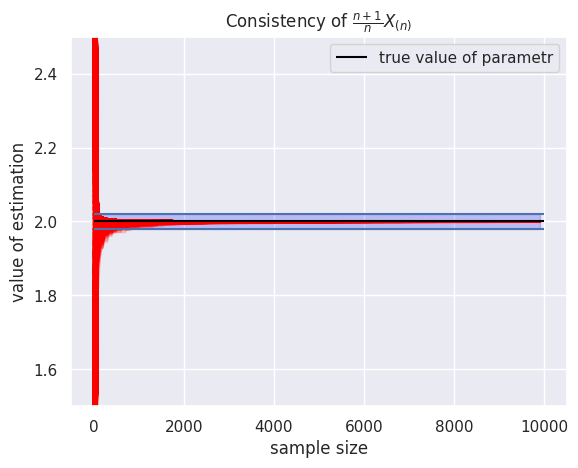

In [89]:
Y = np.maximum.accumulate(X, axis=1) * np.arange(2, N + 2) / np.arange(1, N + 1)
Y = Y.T[0:N+1:100]

plt.title(r"Consistency of $\frac{n + 1}{n}X_{(n)}$")
plt.plot(np.arange(1, N + 1, 100), Y, alpha=0.2, color="red")
plt.xlabel("sample size")
plt.ylabel("value of estimation")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta, label = "true value of parametr"\
           , color="black")
plt.hlines(xmin=1, xmax=N + 1, y=true_theta + 0.02)
plt.hlines(xmin=1, xmax=N + 1, y=true_theta - 0.02)
plt.fill_between(x=np.arange(1, N + 1, 100), y1=2-0.02, y2=2+0.02\
                 , color='blue', alpha=0.2)
plt.legend()
plt.ylim(1.5, 2.5)
plt.show()

И пятая оценка тоже состоятельна, и скорость сходимости хороша, волшебно.

Проверим асимптотическую нормальность.

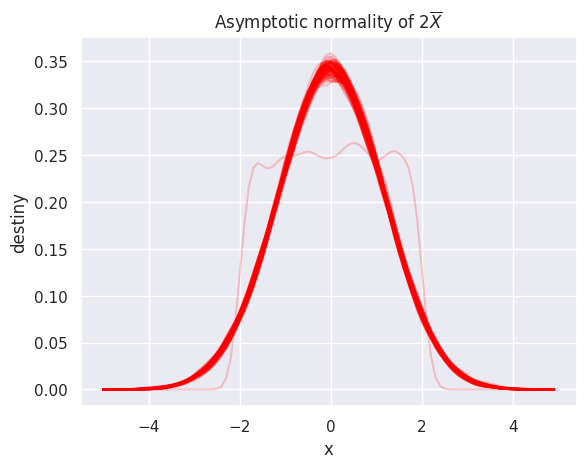

In [92]:
Y = np.sqrt(np.arange(1, N + 1)) * (2 * X.cumsum(axis=1) / np.arange(1, N + 1)\
                                    - 2)
Y = Y.T
kernels = [sps.gaussian_kde(Y[i]) for i in range(0, N, 100)]

plt.title(r"Asymptotic normality of $2 \overline{X}$")
for kernel in kernels:
    plt.plot(np.arange(-5, 5, 1e-1)\
             , kernel(np.arange(-5, 5, 1e-1)), alpha=0.2, color="red")
plt.xlabel("x")
plt.ylabel("destiny")
plt.show()

Наблюдаем сходимсоть графиков эмпирических плотностей к колоколу нормального распределения, есть асимптотическая нормальность.

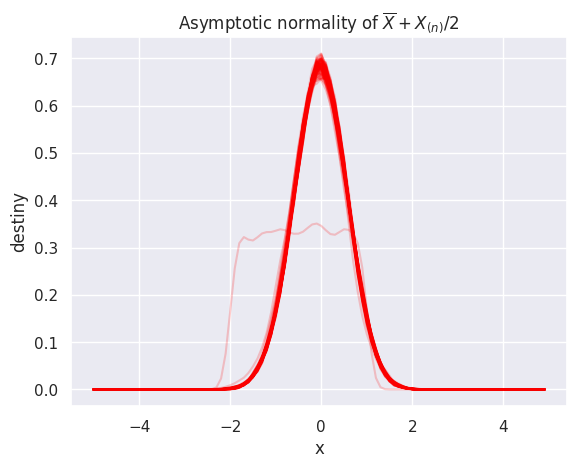

In [93]:
Y = np.sqrt(np.arange(1, N + 1)) * (X.cumsum(axis=1) / np.arange(1, N + 1)\
                                    + np.maximum.accumulate(X, axis=1) / 2 - 2)
Y = Y.T
kernels = [sps.gaussian_kde(Y[i]) for i in range(0, N, 100)]

plt.title(r"Asymptotic normality of $\overline{X} + X_{(n)} / 2$")
for kernel in kernels:
    plt.plot(np.arange(-5, 5, 1e-1)\
             , kernel(np.arange(-5, 5, 1e-1)), alpha=0.2, color="red")
plt.xlabel("x")
plt.ylabel("destiny")
plt.show()

Аналогично, видим сходимость к колоколу, скорее всего, есть асимптотическая нормальность.

Тертью оценку даже проверять не будем, она даже не состоятельна.

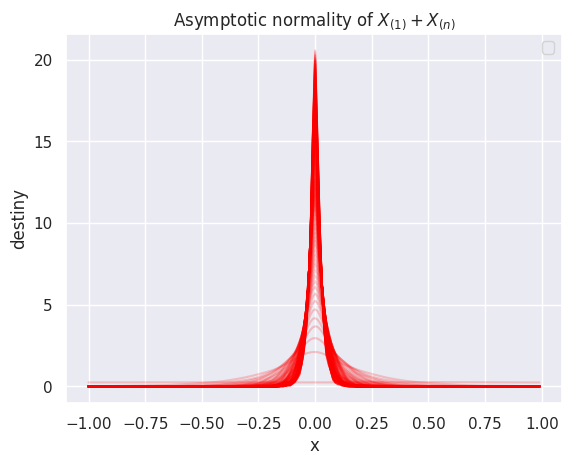

In [94]:
Y = np.sqrt(np.arange(1, N + 1)) * (np.minimum.accumulate(X, axis=1)\
                                    + np.maximum.accumulate(X, axis=1) - 2)
Y = Y.T
kernels = [sps.gaussian_kde(Y[i]) for i in range(0, N, 100)]

plt.title(r"Asymptotic normality of $X_{(1)} + X_{(n)}$")
for kernel in kernels:
    plt.plot(np.arange(-1, 1, 1e-2)\
             , kernel(np.arange(-1, 1, 1e-2)), alpha=0.2, color="red")
plt.xlabel("x")
plt.ylabel("destiny")
plt.legend()
plt.show()

Нет асимптотической нормальности.

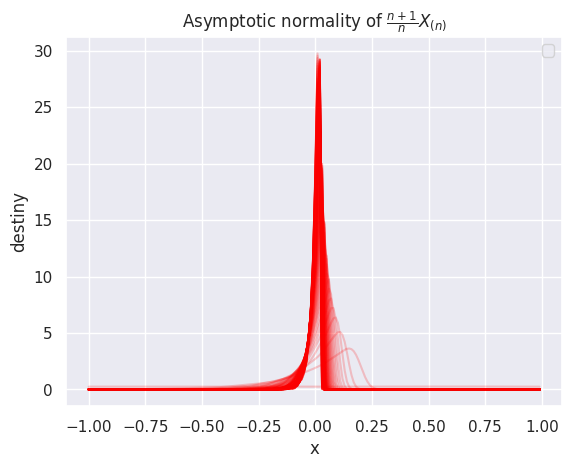

In [95]:
Y = np.sqrt(np.arange(1, N + 1)) * (np.arange(2, N + 2) / np.arange(1, N + 1)\
                                    * np.maximum.accumulate(X, axis=1) - 2)
Y = Y.T
kernels = [sps.gaussian_kde(Y[i]) for i in range(0, N, 100)]

plt.title(r"Asymptotic normality of $\frac{n + 1}{n}X_{(n)}$")
for kernel in kernels:
    plt.plot(np.arange(-1, 1, 1e-2)\
             , kernel(np.arange(-1, 1, 1e-2)), alpha=0.2, color="red")
plt.xlabel("x")
plt.ylabel("destiny")
plt.legend()
plt.show()

Тут тоже нет асимптотической нормальности.

Какая оценка получилась лучше? Как Вы это поняли? А что говорит теория? Стоит ли в данной ситуации сравнивать оценки для других значений параметра $\theta$?

__Ответ:__ Оценки 1, 2, 4, 5 очень неплохи. Они состоятельны. Оценки 1 и 2 даже асимптотически нормальны (кажется). При этом оценки 4, 5 сходятся быстрее, но не асимптотически нормальны. Сказать, какая оценка лучше довольно тяжело,все зависит от того, что мы хотим от оценки. Поняли мы это все из исследования графиков. Изученная к данному моменту теория подтверждает асимптотическую нормальность первой из оценок, а также состоятельность второй, четвертой и пятой. Проверять другие значения параметра нет необходимости, так как от этого только изменится масштаб, на суть исследования это не повлияет.

Сделайте вывод.

__Вывод:__ Двойое среднее и выборочный максимум с поправочным коэффициентом, а также некоторые их линейные комбинации и другие модификации, являются достаточно хорошими оценками параметра $\theta$ в семействе распределений $\left\{U[0; \theta] \mid \theta \in \mathbb{R}_{++} \right\}$. Они состоятельны, и это уже очень хорошо.

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

В этой задаче Вы научитесь подбирать гиперпараметр к семейству оценок. Как известно из основного курса статистики, для любого $k$ оценка  $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ является состоятельной и асимптотически нормальной. Но какой $k$ стоит выбрать?

Сгенерируйте $N$ выборок $X_1, ..., X_N$ размера $n$ из экспоненциального распределения с параметром $\lambda = 1$ для $N = n = 10^4$.

In [4]:
N = 10000

X = sps.expon.rvs(size=(N, N))

Для всех выборок посчитайте оценку $\widehat{\lambda}_k=(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\lambda$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [5]:
hyperparams = np.arange(1, 16)

E = np.zeros(shape=(15, N))
for k in hyperparams:
    E[k - 1] = (math.factorial(k) / ((X ** k).sum(axis=1) / N)) ** (1 / k)

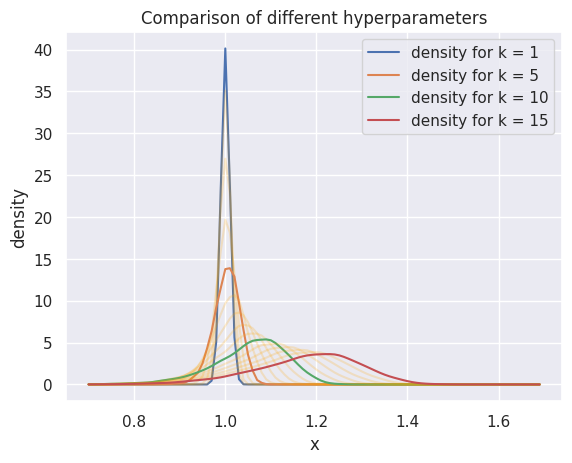

In [6]:
grid = np.arange(0.7, 1.7, 1e-2)

plt.title("Comparison of different hyperparameters")
plt.xlabel("x")
plt.ylabel("density")
for k in hyperparams:
    kernel_k = sps.gaussian_kde(E[k - 1])
    if k % 5 == 0 or k == 1:
        plt.plot(grid, kernel_k(grid), label=f"density for k = {k}")
    else:
        plt.plot(grid, kernel_k(grid), alpha=0.2, color="orange")
plt.legend()
plt.show()

Как видно, с ростом $k$ "хвосты" графиков плотностей у оценок становятся все тяжелее, растет дисперсия, соответственно, качество оценки ухудшается. Самой лучшей на данном этапе кажется оценка при $k = 1$.

Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием -- постройте эмпирическую плотность распределения статистик $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$.

Да, все данные оценки являются асимптотически нормальными. Проверим это теоретически. По ЦПТ

$$\sqrt{n} \left( \overline{X^k} - \mathsf{E}X_1^k \right) \xrightarrow{d} \mathcal{N}\left(0, \mathsf{D}X_1^k\right),$$
$$\sqrt{n} \left( \overline{X^k} - \frac{k!}{\lambda ^k} \right) \xrightarrow{d} \mathcal{N}\left(0, \frac{(2k)! - (k!)^2}{\lambda ^{2k}}\right).$$

Применив дельта-метод с $b_n = \frac{1}{\sqrt{n}}$, $\xi _n=\sqrt{n} \left( \overline{X^k} - \frac{k!}{\lambda ^k} \right)$, $\xi \sim \mathcal{N}\left(0, \frac{(2k)! - (k!)^2}{\lambda ^{2k}}\right)$, $a=\frac{k!}{\lambda ^k}$, $h(x) = \sqrt[k]{\frac{k!}{x}}$ ($h'(x) = -\frac{\sqrt[k]{k!}}{kx\sqrt[k]{x}}$), получим

$$\sqrt{n}\left( \sqrt[k]{\frac{k!}{\overline{X^k}}} - \lambda \right) \xrightarrow{d} \mathcal{N}\left( 0, \left(\frac{\lambda}{k}\right)^2\frac{(2k)! - (k!)^2}{(k!)^2} \right),$$

откуда следует асимптотичечкая нормальность $\widehat{\lambda _k}$.

Можно видеть, что асимптотическая дисперсия очень быстро растет с ростом $k$, а потому лучшая оценка (в асимптотическом подходе) получается при $k = 1$.

Эмпирическую проверку выполним для $k \in \left\{ 1, 2, 3 \right\}$. Сходимость очень медленная, поэтому делать проверку для больших $k$ будет проблематично из-за достаточно маленького размера выборки.

In [7]:
def sigma(k):
    return np.sqrt((math.factorial(2 * k)\
                    - (math.factorial(k)) ** 2) \
                   / (k ** 2 * (math.factorial(k)) ** 2))

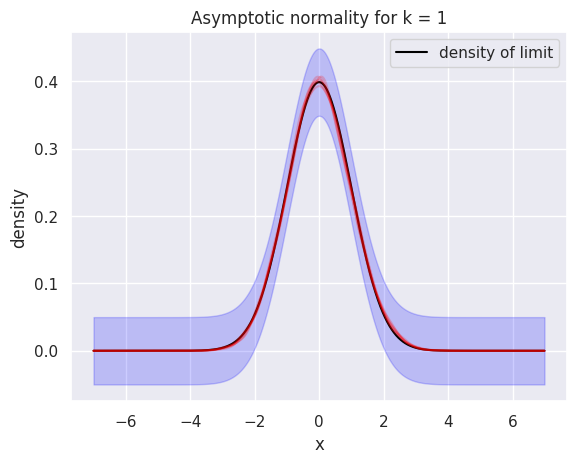

In [8]:
grid = np.arange(-7, 7, 1e-2)
eps=0.05

plt.title("Asymptotic normality for k = 1")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=sigma(1))\
         , label="density of limit", color="black")
plt.fill_between(x=grid, y1=sps.norm.pdf(grid, scale=sigma(1), loc=0) - eps\
                 , y2=sps.norm.pdf(grid, scale=sigma(1), loc=0) + eps\
                 , color='blue', alpha=0.2)
sizes = [5000, 6000, 7000, 8000, 9000, 10000]
for n in sizes:
    Y = np.sqrt(n) * ((math.factorial(1) \
                       / (((X.T[:n]).T ** 1).sum(axis=1) / n)) ** (1 / 1) - 1)
    kernel = sps.gaussian_kde(Y)
    plt.plot(grid, kernel(grid), alpha=0.2, color="red")
plt.legend()
plt.show()

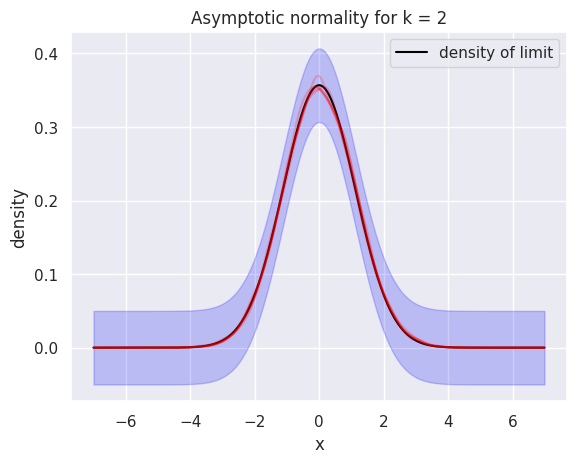

In [9]:
grid = np.arange(-7, 7, 1e-2)
eps=0.05

plt.title("Asymptotic normality for k = 2")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=sigma(2))\
         , label="density of limit", color="black")
plt.fill_between(x=grid, y1=sps.norm.pdf(grid, scale=sigma(2), loc=0) - eps\
                 , y2=sps.norm.pdf(grid, scale=sigma(2), loc=0) + eps\
                 , color='blue', alpha=0.2)
sizes = [5000, 6000, 7000, 8000, 9000, 10000]
for n in sizes:
    Y = np.sqrt(n) * ((math.factorial(2) \
                       / (((X.T[:n]).T ** 2).sum(axis=1) / n)) ** (1 / 2) - 1)
    kernel = sps.gaussian_kde(Y)
    plt.plot(grid, kernel(grid), alpha=0.2, color="red")
plt.legend()
plt.show()

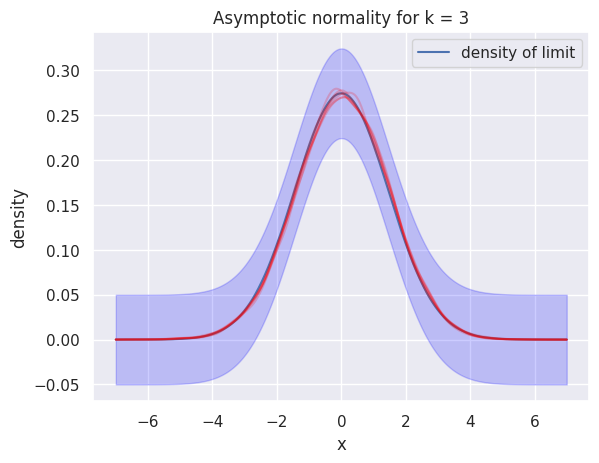

In [10]:
grid = np.arange(-7, 7, 1e-2)
eps=0.05

plt.title("Asymptotic normality for k = 3")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=sigma(3))\
         , label="density of limit")
plt.fill_between(x=grid, y1=sps.norm.pdf(grid, scale=sigma(3), loc=0) - eps\
                 , y2=sps.norm.pdf(grid, scale=sigma(3), loc=0) + eps\
                 , color='blue', alpha=0.2)
sizes = [5000, 6000, 7000, 8000, 9000, 10000]
for n in sizes:
    Y = np.sqrt(n) * ((math.factorial(3) \
                       / (((X.T[:n]).T ** 3).sum(axis=1) / n)) ** (1 / 3) - 1)
    kernel = sps.gaussian_kde(Y)
    plt.plot(grid, kernel(grid), alpha=0.2, color="red")
plt.legend()
plt.show()

Во всех случаях наблюдаем асимптотическую нормальность, так как графики эмпирических плотностей для достаточно больших размеров выборки лежат в $\varepsilon$-окрестности от колоколов нормального распределения, но скорость сходимости с ростом $k$ падает.

Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

Рассмотрим $k \in \left\{ 1, 2, 3 \right\}$. Маленькие значения гиперпараметра берем по тем же причинам, что и раньше.

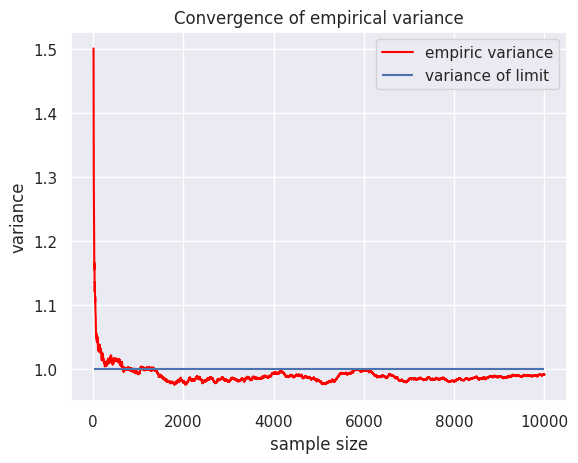

In [11]:
kk = 1

H = (math.factorial(kk) / ((X ** kk).cumsum(axis=1) / np.arange(1, N + 1))) ** (1 / kk)
Y = np.sqrt(np.arange(1, N + 1)) * (H - 1)
V = np.var(Y, axis=0)

plt.title("Convergence of empirical variance")
plt.plot(np.arange(10, N + 1), V[9:], label="empiric variance", color="red")
plt.xlabel("sample size")
plt.ylabel("variance")
plt.hlines(xmin=10, xmax=N, y=sigma(kk) ** 2, label="variance of limit")
plt.legend()
plt.show()

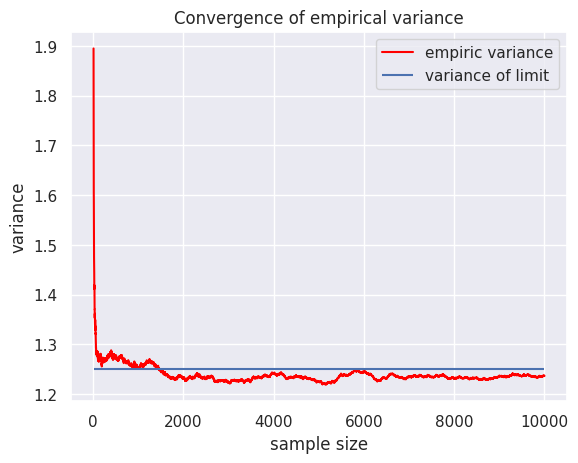

In [12]:
kk = 2

H = (math.factorial(kk) / ((X ** kk).cumsum(axis=1) / np.arange(1, N + 1))) ** (1 / kk)
Y = np.sqrt(np.arange(1, N + 1)) * (H - 1)
V = np.var(Y, axis=0)

plt.title("Convergence of empirical variance")
plt.plot(np.arange(10, N + 1), V[9:], label="empiric variance", color="red")
plt.xlabel("sample size")
plt.ylabel("variance")
plt.hlines(xmin=10, xmax=N, y=sigma(kk) ** 2, label="variance of limit")
plt.legend()
plt.show()

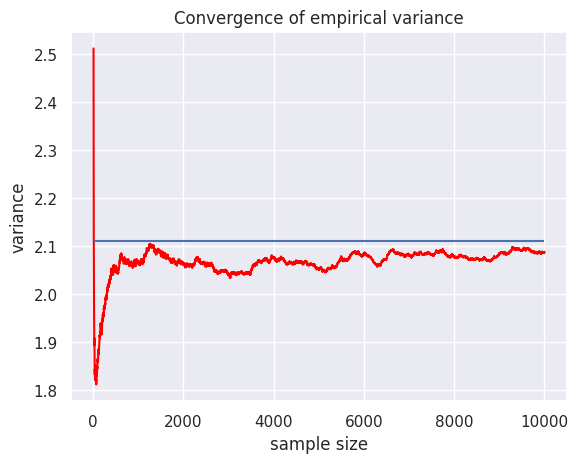

In [13]:
kk = 3

H = (math.factorial(kk) / ((X ** kk).cumsum(axis=1) / np.arange(1, N + 1))) ** (1 / kk)
Y = np.sqrt(np.arange(1, N + 1)) * (H - 1)
V = np.var(Y, axis=0)

plt.title("Convergence of empirical variance")
plt.plot(np.arange(10, N + 1), V[9:], color="red", label="empiric variance")
plt.xlabel("sample size")
plt.ylabel("variance")
plt.hlines(xmin=10, xmax=N, y=sigma(kk) ** 2, label="variance of limit")
plt.show()

Везде наблдаем сходимость эмпирической дисперсии к теоретической, но скорость сходимости падает с ростом $k$.

На одном графике изобразите плотности распределений оценок для разных $k$ и на основе графика сделайте выбор параметра. Обоснуйте его.

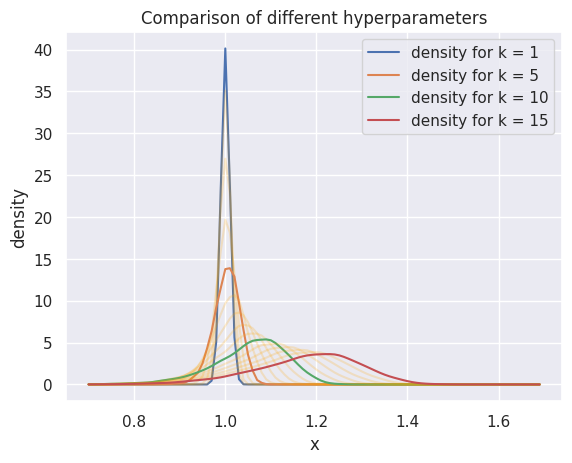

In [14]:
grid = np.arange(0.7, 1.7, 1e-2)

plt.title("Comparison of different hyperparameters")
plt.xlabel("x")
plt.ylabel("density")
for k in hyperparams:
    kernel_k = sps.gaussian_kde(E[k - 1])
    if k % 5 == 0 or k == 1:
        plt.plot(grid, kernel_k(grid), label=f"density for k = {k}")
    else:
        plt.plot(grid, kernel_k(grid), alpha=0.2, color="orange")
plt.legend()
plt.show()

Лучшая оценка - оценка при $k = 1$, т.к. её плотность лучше других концентрируется вокруг истинного значения параметра.

Для одной выборки постройте графики $\left|\hat{\lambda}_k - \lambda\right|$ и сравните скорости сходимости к нулю при увеличении размера выборки.

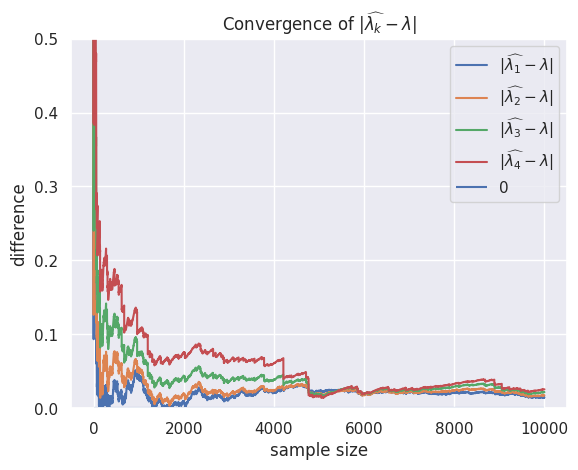

In [15]:
Z = X[2306]
Y_1 = abs((math.factorial(1) / ((Z ** 1).cumsum() / np.arange(1, N + 1))) ** (1 / 1) - 1)
Y_2 = abs((math.factorial(2) / ((Z ** 2).cumsum() / np.arange(1, N + 1))) ** (1 / 2) - 1)
Y_3 = abs((math.factorial(3) / ((Z ** 3).cumsum() / np.arange(1, N + 1))) ** (1 / 3) - 1)
Y_4 = abs((math.factorial(4) / ((Z ** 4).cumsum() / np.arange(1, N + 1))) ** (1 / 4) - 1)

plt.title(r"Convergence of $|\widehat{\lambda _k} - \lambda|$")
plt.xlabel("sample size")
plt.ylabel("difference")
plt.plot(np.arange(1, N + 1), Y_1, label=r"$|\widehat{\lambda _1} - \lambda|$")
plt.plot(np.arange(1, N + 1), Y_2, label=r"$|\widehat{\lambda _2} - \lambda|$")
plt.plot(np.arange(1, N + 1), Y_3, label=r"$|\widehat{\lambda _{3}} - \lambda|$")
plt.plot(np.arange(1, N + 1), Y_4, label=r"$|\widehat{\lambda _{4}} - \lambda|$")
plt.hlines(xmin=1, xmax=N, y=0, label="0")
plt.legend()
plt.ylim(0, 0.5)
plt.show()

Чем меньше $k$ - тем лучше скорость сходимости.

Сделайте вывод.


__Вывод:__ как бы мы ни сравнивали, оценка тем лучше, чем меньше $k$. В частности, лучшая оценка у нас получается при $k = 1$.

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

В этой задаче Вам нужно показать на примере, как построение интуитивно понятной оценки без теоретического обоснования может дать неадекватный результат.

Ниже напишите, какое поведение Вы ожидаете от оценки среднего и медианы. Обоснуйте ожидания, ссылаясь на теоремы и задачи из курса теории вероятностей:

Ответ: выборочная медиана должна быть асимптотически нормальной оценкой по теореме о выборочной медиане. А вот выборочное среднее, кажется, не будет ни к чему сходиться, так как у распределения Коши нет математического ожидания и всякие ЗБЧ не выполнены.

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства?

Будем рассматривать распределение Коши с функцией плотности $f_{\theta}(x) = \frac{1}{\pi}\left( \frac{1}{(x - \theta)^2 + 1}\right)$ с параметром $\theta = 0$. Будем изучать оценки для этой самой $\theta$.

In [16]:
N = 1000

X = sps.cauchy.rvs(loc=0, scale=1, size=(N, N))

In [17]:
Mid = X.cumsum(axis=1) / np.arange(1, N + 1)
Med = np.zeros((N, N))
for i in tqdm(range(N)):
    for j in range(N):
        Med[i][j] = np.median(X[i][:j + 1])

# Я не придумал, как посчитать без цикла, простите:(

100%|██████████| 1000/1000 [00:38<00:00, 26.04it/s]


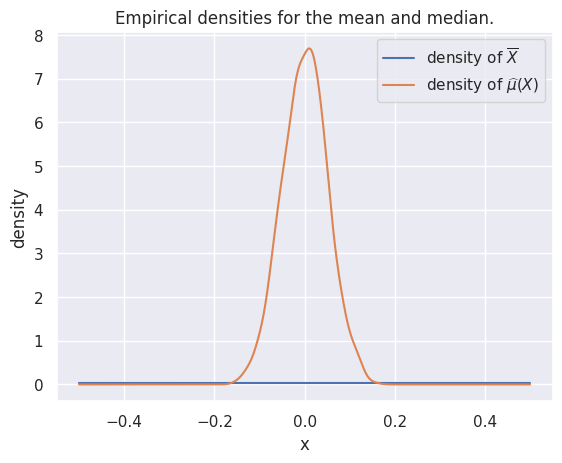

In [18]:
kernel_mid = sps.gaussian_kde(Mid.T[-1])
kernel_med = sps.gaussian_kde(Med.T[-1])

grid = np.arange(-0.5, 0.5, 1e-3)

plt.title("Empirical densities for the mean and median.")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(grid, kernel_mid(grid), label=r"density of $\overline{X}$")
plt.plot(grid, kernel_med(grid), label=r"density of $\widehat{\mu}(X)$")
plt.legend()
plt.show()

Как можно видеть из этого графика, плотность выборочной медианы при достаточно большом размере выборки концентрируется вокруг нуля, то есть истинного значения параметра. А плотность выборочного среднего даже близко не показывает такого поведения, никакой концентрации около нуля не наблюдается. В какой-то мере это уже подтверждает наши догадки. Однако займемся дальнейшими исследованиями.

Проверьте свои теоретические ожидания, написанные в начале задачи. Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны.

Для начала проверим, является ли выборочная медиана состоятельной оценкой.

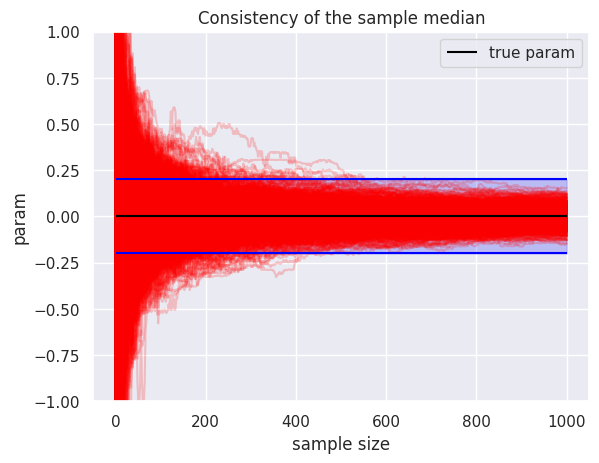

In [19]:
eps=0.2

plt.title("Consistency of the sample median")
plt.ylabel("param")
plt.xlabel("sample size")
plt.plot(np.arange(1, N + 1), Med.T, alpha=0.2, color="red")
plt.hlines(xmin=1, xmax=N, color="black", y=0, label="true param")
plt.hlines(xmin=1, xmax=N, color="blue", y=-eps)
plt.hlines(xmin=1, xmax=N, color="blue", y=eps)
plt.fill_between(x=np.arange(1, N + 1), y1=np.array([-eps] * N)\
                 , y2=np.array([eps] * N), color="blue", alpha=0.2)
plt.legend()
plt.ylim(-1, 1)
plt.show()

Можно видеть, что выборочная медиана является состоятельной оценкой. Проверим её асимптотическую нормальность. Предельное (по распределению) значение плотности возьмём из теории, а именно, из теоремы об асимптотической нормальности выборочной медианы.

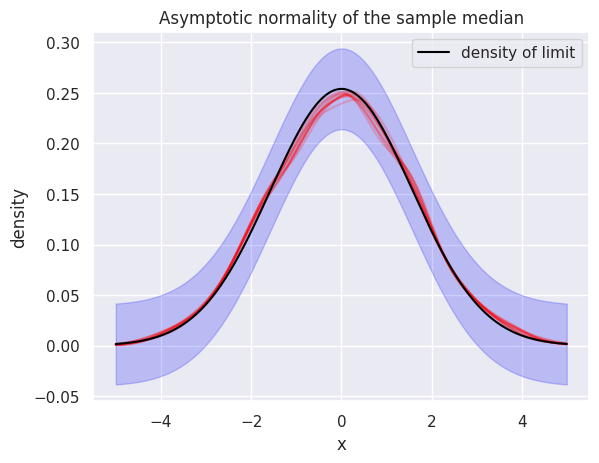

In [20]:
grid = np.arange(-5, 5, 1e-2)
true_sigma = np.pi / 2
eps=0.04

plt.title("Asymptotic normality of the sample median")
plt.xlabel("x")
plt.ylabel("density")
for n in range(9 * N // 10 - 1, N, N // 100):
    kernel=sps.gaussian_kde(np.sqrt(n + 1) * Med.T[n])
    plt.plot(grid, kernel(grid), alpha=0.2\
             , color="red")
plt.plot(grid, sps.norm.pdf(grid, scale=true_sigma, loc=0)\
         , label='density of limit', color='black')
plt.fill_between(x=grid, y1=sps.norm.pdf(grid, scale=true_sigma, loc=0) - eps\
                 , y2=sps.norm.pdf(grid, scale=true_sigma, loc=0) + eps\
                 , color='blue', alpha=0.2)
plt.legend()
plt.show()

Можно видеть, что для достаточно больших размеров выборки эмпирические плотности лежат в достаточно маленькой $\varepsilon$-окрестности графика плотности нормального распределения, а значит, они эмпирические плотности равномерно сходятся к плотности нормального распределения, что свидетельствует об асимптотичсекой нормальности выборочной медианы.

Теперь исследуем состоятельность выборочного среднего.

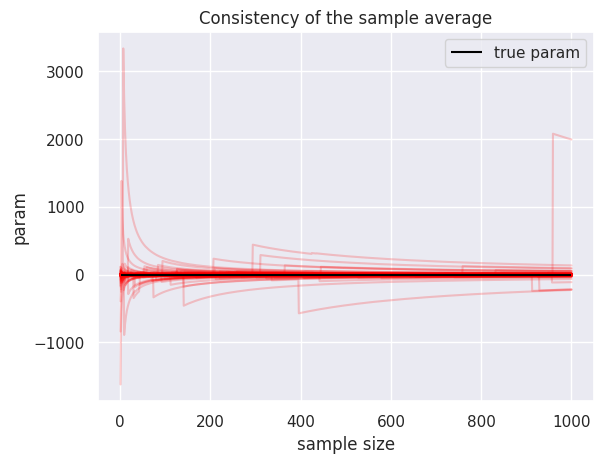

In [21]:
plt.title("Consistency of the sample average")
plt.ylabel("param")
plt.xlabel("sample size")
plt.plot(np.arange(1, N + 1), Mid.T, alpha=0.2, color="red")
plt.hlines(xmin=1, xmax=N, color="black", y=0, label="true param")
plt.legend()
plt.show()

Получилось красиво. Но состоятельности нет. А значит, нет и асимптотической нормальности. Ожидаемо.

Изучите поведение эмпирической дисперсии оценок среднего и медианы. Какая из них сходится? С какой скоростью? Для проверки постройте график какой-то детерминированной функции с такой же скоростью сходимости.

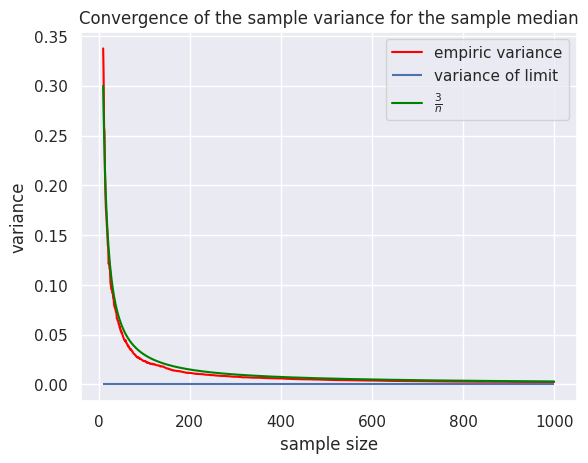

In [22]:
V = np.var(Med, axis=0)

plt.title("Convergence of the sample variance for the sample median")
plt.plot(np.arange(10, N + 1), V[9:], color="red", label="empiric variance")
plt.xlabel("sample size")
plt.ylabel("variance")
plt.hlines(xmin=10, xmax=N, y=0, label="variance of limit")
plt.plot(np.arange(10, N + 1), 3 / np.arange(10, N + 1), color="green"\
         , label=r"$\frac{3}{n}$")
plt.legend()
plt.show()

Эмпирическая дисперсия сходится к нулю для выборочной медианы, и делает это примерно со скоростью функции $\frac{3}{n}$, где $n$ - размер выборки.

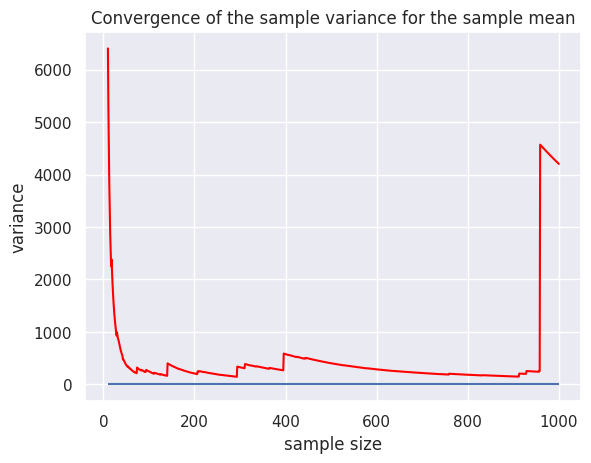

In [23]:
V = np.var(Mid, axis=0)

plt.title("Convergence of the sample variance for the sample mean")
plt.plot(np.arange(10, N + 1), V[9:], color="red", label="empiric variance")
plt.xlabel("sample size")
plt.ylabel("variance")
plt.hlines(xmin=10, xmax=N, y=0, label="variance of limit")
plt.show()

А вот для выборочного среднего уже нет никакой сходимости к нулю эмпирической дисперсии. Печально, но ожидаемо.

**Вывод:**

Выборочное среднее интуитивно кажется хорошей оценкой для параметра сдвига в распределении Коши. Но интуиция не всегда подсказывает нам правду. И выборочное среднее на деле оказывается бесполезной оценкой, у которой странный график эмпирической потности, нет ни состоятельности, ни, тем более, асимптотической  нормальности, ни сходимости к нулю выборочной дисперсии. В общем, ничего хорошего.

А хорошей во всех смыслах оценкой оказывается выборочная медиана. Это же подтверждается и теорией.



### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Эта задача посвящена проверке теоремы Гливенко-Кантелли, как основного теоретического результата курса. Условия посмотрите в методичке или сходите на лекцию старшего магистра колдовства и чародейства Савёлова М.П.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ размера $N$ из стандартного нормального распределения для $N = 10^4$.

*Remark: снизили $N$ до 1000, потому что иначе все падает на моменте вычисления $D_n$...*

In [24]:
np.random.seed(42)

In [25]:
N = 1000

In [26]:
X = sps.norm.rvs(size=(N, N))

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [27]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdfs = [ECDF(X[0][:i]) for i in range(1, len(X) + 1)]

Для некоторых $n$ (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`) и сравните каждый из них с истинной функцией распределения (количество графиков равно количеству различных значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

In [28]:
grid = np.arange(-5, 5, 1e-2)

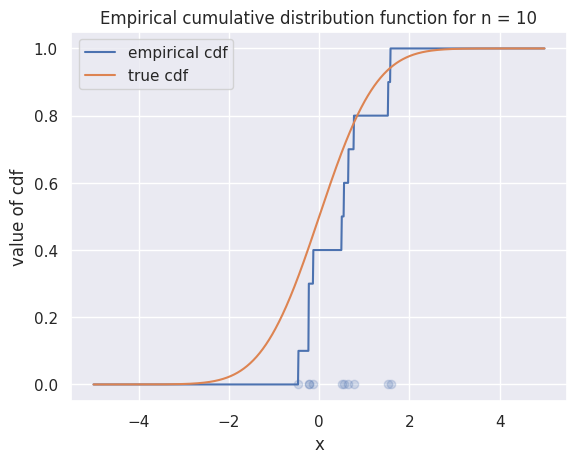

In [29]:
plt.title("Empirical cumulative distribution function for n = 10")
plt.xlabel("x")
plt.ylabel("value of cdf")
plt.plot(grid, ecdfs[9](grid), label="empirical cdf")
plt.plot(grid, sps.norm.cdf(grid), label="true cdf")
plt.legend()
plt.scatter(x=X[0][:10], y=[0] * 10, alpha=0.2)
plt.show()

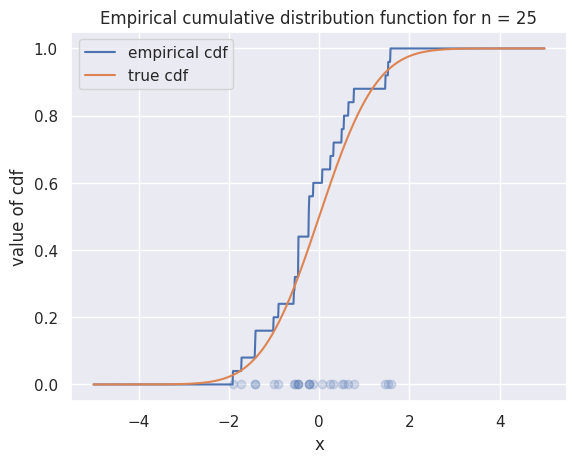

In [30]:
plt.title("Empirical cumulative distribution function for n = 25")
plt.xlabel("x")
plt.ylabel("value of cdf")
plt.plot(grid, ecdfs[24](grid), label="empirical cdf")
plt.plot(grid, sps.norm.cdf(grid), label="true cdf")
plt.legend()
plt.scatter(x=X[0][:25], y=[0] * 25, alpha=0.2)
plt.show()

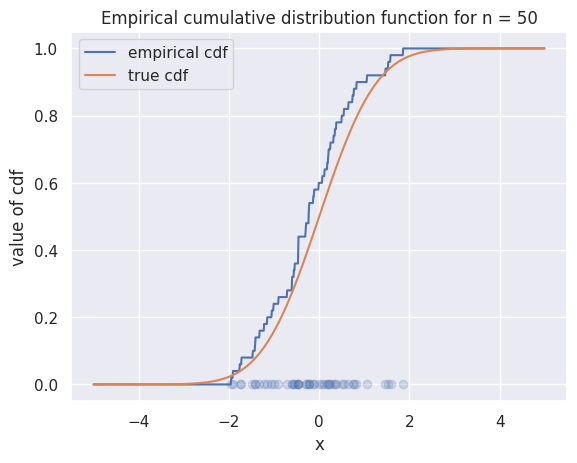

In [31]:
plt.title("Empirical cumulative distribution function for n = 50")
plt.xlabel("x")
plt.ylabel("value of cdf")
plt.plot(grid, ecdfs[49](grid), label="empirical cdf")
plt.plot(grid, sps.norm.cdf(grid), label="true cdf")
plt.legend()
plt.scatter(x=X[0][:50], y=[0] * 50, alpha=0.2)
plt.show()

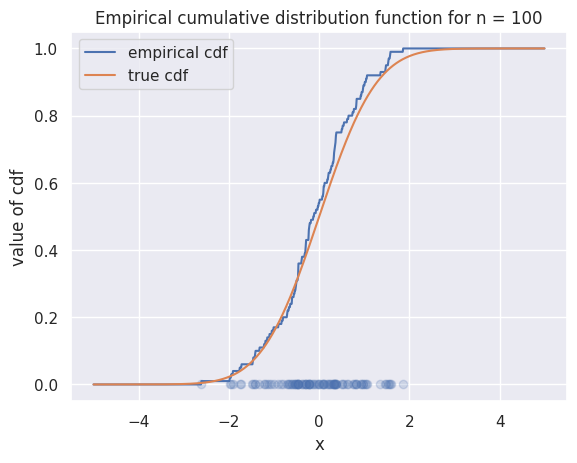

In [32]:
plt.title("Empirical cumulative distribution function for n = 100")
plt.xlabel("x")
plt.ylabel("value of cdf")
plt.plot(grid, ecdfs[99](grid), label="empirical cdf")
plt.plot(grid, sps.norm.cdf(grid), label="true cdf")
plt.legend()
plt.scatter(x=X[0][:100], y=[0] * 100, alpha=0.2)
plt.show()

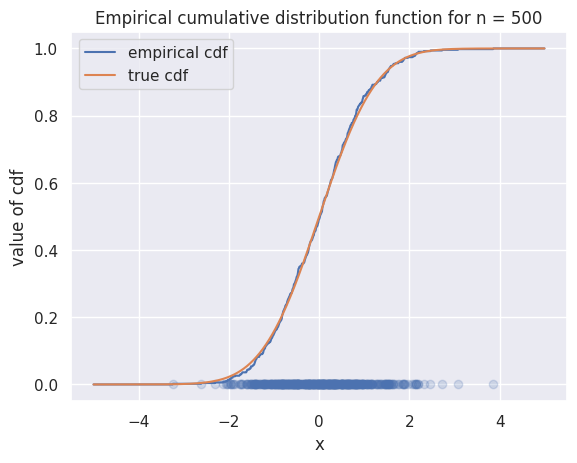

In [33]:
plt.title("Empirical cumulative distribution function for n = 500")
plt.xlabel("x")
plt.ylabel("value of cdf")
plt.plot(grid, ecdfs[499](grid), label="empirical cdf")
plt.plot(grid, sps.norm.cdf(grid), label="true cdf")
plt.legend()
plt.scatter(x=X[0][:500], y=[0] * 500, alpha=0.2)
plt.show()

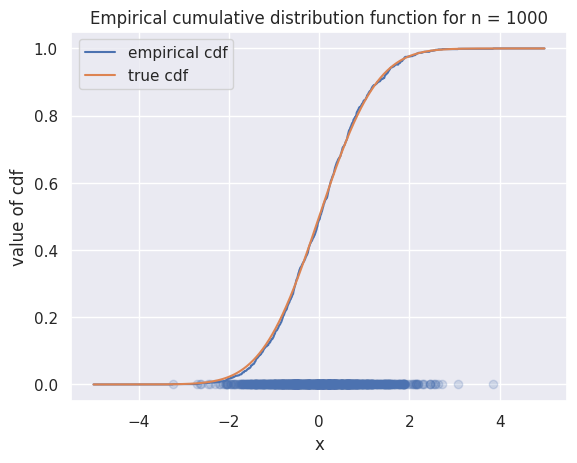

In [34]:
plt.title("Empirical cumulative distribution function for n = 1000")
plt.xlabel("x")
plt.ylabel("value of cdf")
plt.plot(grid, ecdfs[999](grid), label="empirical cdf")
plt.plot(grid, sps.norm.cdf(grid), label="true cdf")
plt.legend()
plt.scatter(x=X[0][:1000], y=[0] * 1000, alpha=0.2)
plt.show()

Чем больше размер выборки, тем больше похожа эмпиричечкая функция распределения на истинную. Собственно, теорема Гливенко-Кантелли тоже говорит об этом, так что мы численно её проверили.

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x \in \mathbb R}} | \hat{F}_n(x) - F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. Наблюдается ли сходимость их распределений на графиках?


*Remark: посчитать супремум эмпирически навряд ли возможно. Посчитаем максимум по достаточно мелкой сетке.*

In [35]:
ecdfs_all = [[ECDF(X[j][:i]) for i in range(1, len(X) + 1)]\
             for j in range(0, N)]

In [36]:
grid = np.arange(-5, 5, 1e-2)
D = [[(ecdfs_all[i][n](grid) - sps.norm.cdf(grid)).max() for n in range(0, N)] for i in range(0, N)]

In [37]:
D = np.array(D)

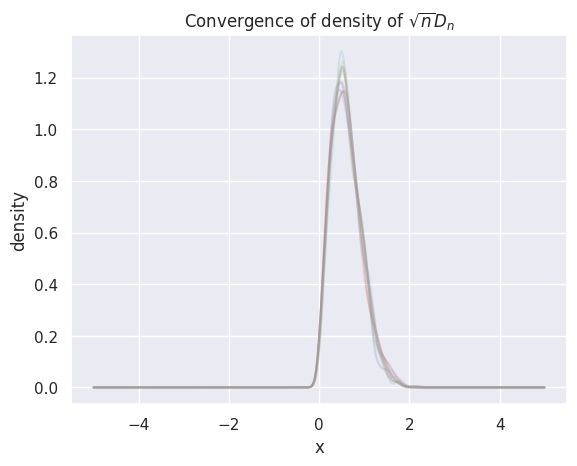

In [38]:
grid = np.arange(-5, 5, 1e-2)
sizes = [100 * k for k in range(1, 11)]

plt.title(r"Convergence of density of $\sqrt{n}D_n$")
plt.xlabel("x")
plt.ylabel("density")
for n in sizes:
    kernel = sps.gaussian_kde(np.sqrt(n) * D.T[n - 1])
    plt.plot(grid, kernel(grid), alpha=0.2)
plt.show()

Пища для ума: если Ваша эмпирическая плотность сходится к чему-то, то это не просто так! Поищите на просторах интернета, учебников и бесед с умными людьми, куда должна сходиться статистика $\sqrt{n}D_n$. Подумайте, для чего может быть полезен этот теоретический результат.

Ответ: интернет подсказывает, что есть прекрасная теорема Колмогорова, согласно которой статистика $\sqrt{n}D_n$ в случае непрерывной функции распределения $F$ (для нормального распределения она, конечно, непрерывна) сходится по распределению к с.в. $\eta$ с распределением Колмогорова, т.е. имеющей функцию распределения
$$F_\eta(x) = I\left\{ x > 0 \right\} \cdot \sum\limits_{k = -\infty}^{+\infty}(-1)^ke^{-2k^2x^2}.$$ В целом, похоже на правду.

Данный теоретический результат помогает оценить скорость сходимости в теореме Гливенко-Кантелли. Она имеет порядок $\frac{1}{\sqrt{n}}$.

Сделайте вывод о важности теоремы Гливенко-Кантелли в численном анализе. Какие методы, применяемые Вами в других задачах неявно основываются на этой теореме?

**Вывод:** теорема Гливенко-Кантлелли помоагет теоретичсеки обосновать, что эмпирическая функция распределения - это хорошее приближение настоящей, истинной функции распределения. Т.е. если у нас достаточно большая выборка, то можно спокойно вычислить эмпирическую функцию распределения и использовать ее вместо истинной. К тому же теорема Гливенко-Кантелли - кирпичик в обосновании метода подстановки.

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

В этой задаче Вам предлагается изучить инструмент QQ-plot и сделать на его основе выводы о равенстве распределений.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $\mathrm U{[0, \theta]}$ для $\theta=1$ размера $n=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

Указание: можно взять код и результаты из задачи 1. Просто скопируйте их сюда.

In [39]:
N_samples = 400
n = 40

bins = [i / 40 + 0.8 for i in range(18)]

In [40]:
X  = sps.uniform.rvs(loc=0, scale=1, size=(N_samples, n))
estimation_1 = 2 * X.mean(axis=1)
estimation_2 = (n + 1) / n * X.max(axis=1)

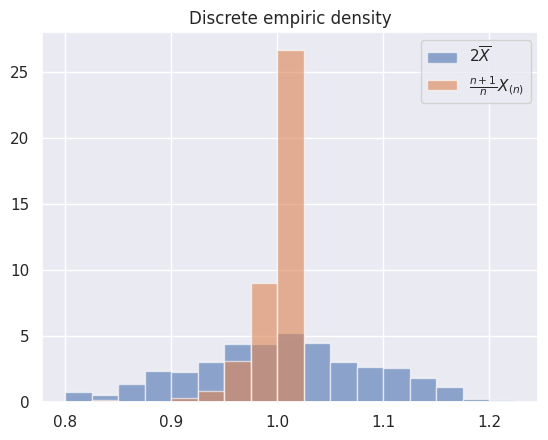

In [41]:
plt.title(r"Discrete empiric density")
_ = plt.hist(estimation_1, bins=bins, density=True, alpha=0.6\
             , label=r"$2\overline{X}$")
_ = plt.hist(estimation_2, bins=bins, density=True, alpha=0.6\
             , label=r"$\frac{n+1}{n}X_{(n)}$")
plt.legend()
plt.show()

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $n$?

**Ответ:** их распределения сходятся к нормальному и экспоненциальному соответственно.

In [42]:
Y = np.sqrt(np.arange(1, n + 1)) * (2 * X.cumsum(axis=1) / np.arange(1, n + 1) - 1)
Z = 1 - np.arange(1, n + 1) * ((np.arange(2, n + 2) / np.arange(1, n + 1)) * np.maximum.accumulate(X, axis=1) - 1)

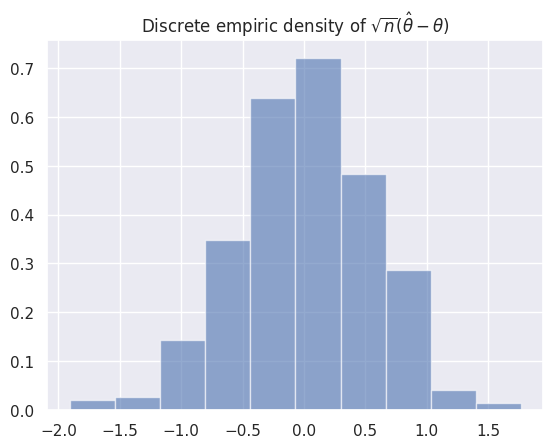

In [43]:
plt.title(r"Discrete empiric density of $\sqrt{n} (\hat\theta - \theta)$")
_ = plt.hist(Y.T[-1], density=True, alpha=0.6)
plt.show()

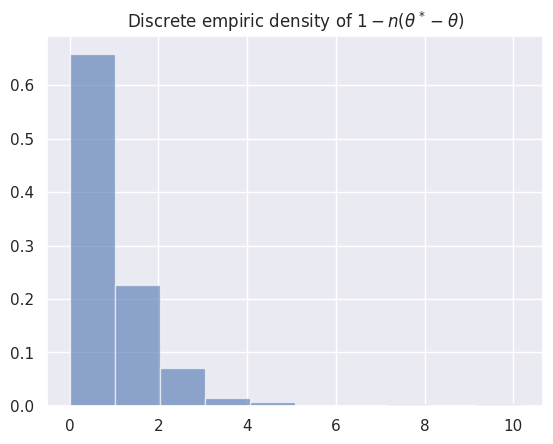

In [44]:
plt.title(r"Discrete empiric density of $1 - n  (\theta^* - \theta)$")
_ = plt.hist(Z.T[-1], density=True, alpha=0.6)
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** похоже на нормальное и экспоненциальное распределения соответственно.

Вспомните, чему равен коэффициент $\sigma^2(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} \mathcal N(0, 1).
$$

**Ответ**: по ЦПТ и лемме Слуцкого она равен $4\mathsf{D}X_1 = 4 \cdot \frac{\theta ^2}{12} = \frac{\theta^2}{3}$.

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}$$ для каждой выборки. Постройте её плотность теоретически и при помощи KDE.

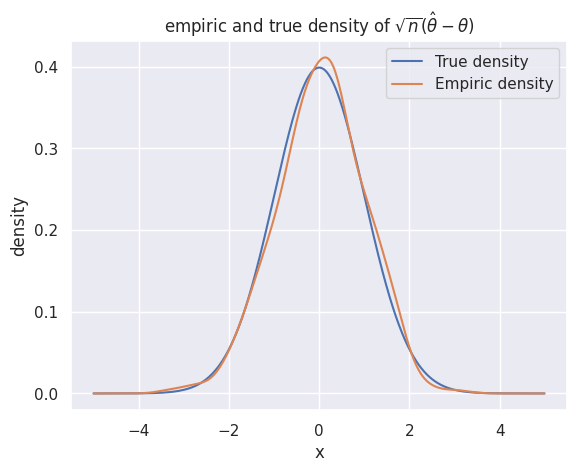

In [45]:
grid = np.arange(-5, 5, 1e-2)

kernel = sps.gaussian_kde(Y.T[-1] / ((1 / 3) ** (1 / 2)))
plt.title(r"empiric and true density of $\sqrt{n} (\hat\theta - \theta)$")
plt.xlabel("x")
plt.ylabel("density")
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1)\
         , label="True density")
plt.plot(grid, kernel(grid), label="Empiric density")
plt.legend()
plt.show()

Похоже, приятно.

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению, часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Изучите семинарский ноутбук ноль и постройте QQ-plot предложенной статистики и нормального распределения.

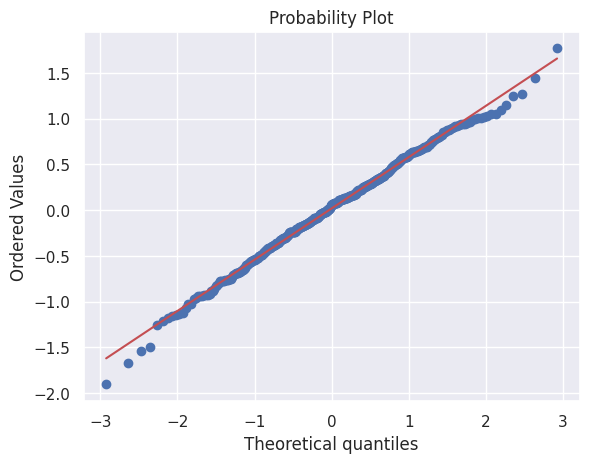

In [46]:
_ = sps.probplot(Y.T[-1], dist=sps.norm(loc=0, scale=1), plot=plt)

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** утверждать - слишком громкое слово. Но очень похоже на нормальное, да, можно достаточно уверенно сказать, что выборка из нормального распределения.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

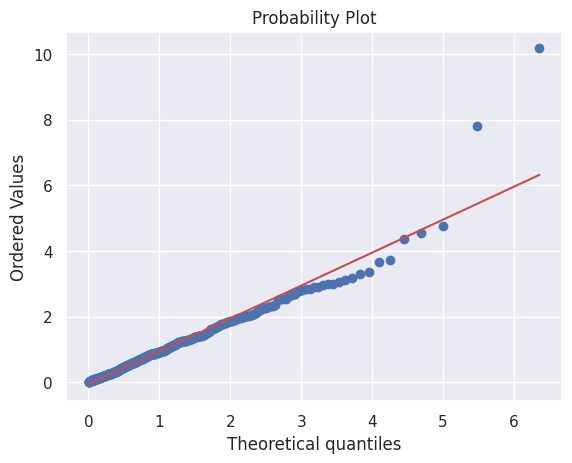

In [47]:
_ = sps.probplot(Z.T[-1], dist=sps.expon(), plot=plt)

**Ответ:** Экспоненциальное хорошо подходит:)

Бонусная часть (+5 баллов): Если Вы нашли семейство распределений, которое по QQ-plot соответствует выборке, то докажите строго, что $n(\theta^* - \theta)$ сходится к нему. Заметьте, что это утверждение от асимптотической нормальности отличается только заменой $\sqrt{n}$ на $n$. Такие оценки называются **сверхнормальными**. В конце доказательства поясните:

- как множитель, зависящий от $n$, связан с скоростью сходимости оценки на практике?
- лучше ли сверхномальная оценка, чем нормальная оценка?

**Решение:**

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

Не забудьте перезапустить с нуля весь ноутбук перед отправкой! Удачи.